In [9]:
import pandas as pd

In [11]:
df = pd.read_parquet('esa-adb-challenge/test.parquet')

In [12]:
df.head()

,id,channel_1,channel_10,channel_11,channel_12,channel_13,channel_14,channel_15,channel_16,channel_17,...,telecommand_350,telecommand_351,telecommand_352,telecommand_353,telecommand_354,telecommand_36,telecommand_376,telecommand_38,telecommand_39,telecommand_40
0,14728321,0.13791,0.0,0.0,0.218915,0.270384,0.63107,0.314563,0.786995,0.265045,...,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0
1,14728322,0.13791,0.0,0.0,0.218915,0.270384,0.63107,0.314563,0.786995,0.265045,...,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0
2,14728323,0.13791,0.0,0.0,0.218915,0.270384,0.63107,0.314563,0.786995,0.265045,...,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0
3,14728324,0.13791,0.0,0.0,0.218915,0.270384,0.63107,0.314563,0.786995,0.265045,...,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0
4,14728325,0.13791,0.0,0.0,0.218915,0.270384,0.63107,0.314563,0.786995,0.265045,...,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0


In [13]:
list(df.columns)

['id',
 'channel_1',
 'channel_10',
 'channel_11',
 'channel_12',
 'channel_13',
 'channel_14',
 'channel_15',
 'channel_16',
 'channel_17',
 'channel_18',
 'channel_19',
 'channel_2',
 'channel_20',
 'channel_21',
 'channel_22',
 'channel_23',
 'channel_24',
 'channel_25',
 'channel_26',
 'channel_27',
 'channel_28',
 'channel_29',
 'channel_3',
 'channel_30',
 'channel_31',
 'channel_32',
 'channel_33',
 'channel_34',
 'channel_35',
 'channel_36',
 'channel_37',
 'channel_38',
 'channel_39',
 'channel_4',
 'channel_40',
 'channel_41',
 'channel_42',
 'channel_43',
 'channel_44',
 'channel_45',
 'channel_46',
 'channel_47',
 'channel_48',
 'channel_49',
 'channel_5',
 'channel_50',
 'channel_51',
 'channel_52',
 'channel_53',
 'channel_54',
 'channel_55',
 'channel_56',
 'channel_57',
 'channel_58',
 'channel_59',
 'channel_6',
 'channel_60',
 'channel_61',
 'channel_62',
 'channel_63',
 'channel_64',
 'channel_65',
 'channel_66',
 'channel_67',
 'channel_68',
 'channel_69',
 'channel

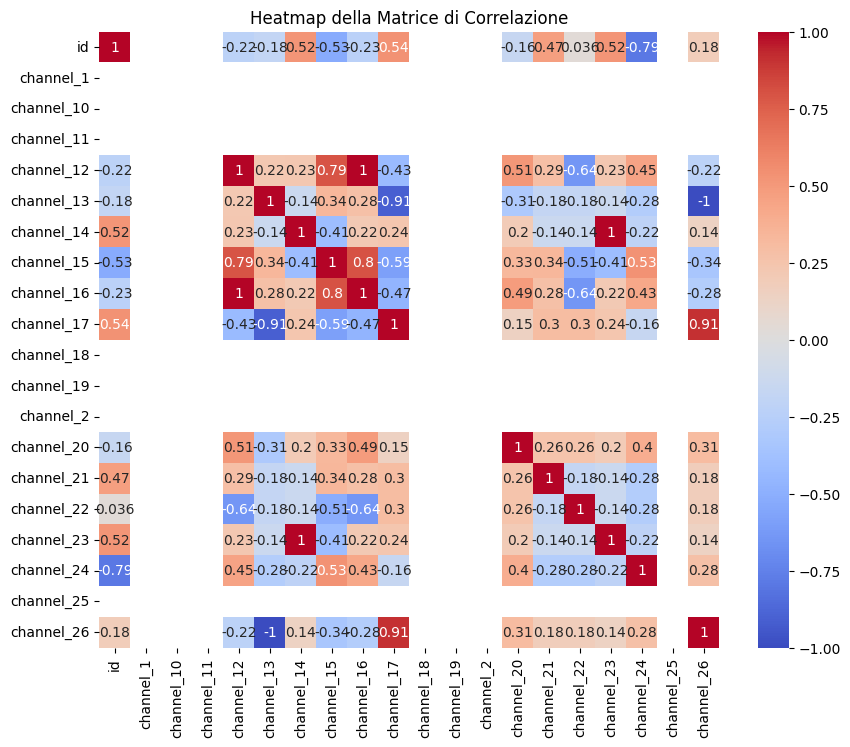

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.iloc[:20, :20].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap della Matrice di Correlazione')
plt.show()

In [15]:
import pyarrow.parquet as pq
import pandas as pd

file_path = 'esa-adb-challenge/train.parquet'

# Open the Parquet file
parquet_file = pq.ParquetFile(file_path)

# List to store filtered chunks
filtered_chunks = []

# Read in chunks (batch size = 1000 rows)
for batch in parquet_file.iter_batches(batch_size=1000):
    chunk_df = batch.to_pandas()  # Convert batch to DataFrame
    
    # Select only channels 41 to 46 + is_anomaly column
    selected_columns = ["is_anomaly"] + [f"channel_{i}" for i in range(41, 47)]
    filtered_chunk = chunk_df[selected_columns]
    
    # Store the filtered chunk
    filtered_chunks.append(filtered_chunk)
    break

# Merge all chunks into a single DataFrame
merged_df = pd.concat(filtered_chunks, ignore_index=True)

# Display result
print(merged_df.head())



   is_anomaly  channel_41  channel_42  channel_43  channel_44  channel_45  \
0           0    0.812578    0.786344    0.771900    0.799178    0.816855   
1           0    0.812578    0.786344    0.771900    0.799178    0.816855   
2           0    0.821213    0.789557    0.770317    0.809411    0.816006   
3           0    0.819642    0.786344    0.770317    0.807050    0.816855   
4           0    0.821996    0.788753    0.770317    0.807837    0.818551   

   channel_46  
0    0.765296  
1    0.765296  
2    0.765296  
3    0.766985  
4    0.761073  


In [16]:
list(chunk_df.columns)

['id',
 'channel_1',
 'channel_10',
 'channel_11',
 'channel_12',
 'channel_13',
 'channel_14',
 'channel_15',
 'channel_16',
 'channel_17',
 'channel_18',
 'channel_19',
 'channel_2',
 'channel_20',
 'channel_21',
 'channel_22',
 'channel_23',
 'channel_24',
 'channel_25',
 'channel_26',
 'channel_27',
 'channel_28',
 'channel_29',
 'channel_3',
 'channel_30',
 'channel_31',
 'channel_32',
 'channel_33',
 'channel_34',
 'channel_35',
 'channel_36',
 'channel_37',
 'channel_38',
 'channel_39',
 'channel_4',
 'channel_40',
 'channel_41',
 'channel_42',
 'channel_43',
 'channel_44',
 'channel_45',
 'channel_46',
 'channel_47',
 'channel_48',
 'channel_49',
 'channel_5',
 'channel_50',
 'channel_51',
 'channel_52',
 'channel_53',
 'channel_54',
 'channel_55',
 'channel_56',
 'channel_57',
 'channel_58',
 'channel_59',
 'channel_6',
 'channel_60',
 'channel_61',
 'channel_62',
 'channel_63',
 'channel_64',
 'channel_65',
 'channel_66',
 'channel_67',
 'channel_68',
 'channel_69',
 'channel

In [28]:
merged_df.to_parquet('filtered.parquet')

In [20]:
merged_df.shape

(1000, 7)

In [18]:
chunk_df.head(10)

,id,channel_1,channel_10,channel_11,channel_12,channel_13,channel_14,channel_15,channel_16,channel_17,...,telecommand_351,telecommand_352,telecommand_353,telecommand_354,telecommand_36,telecommand_376,telecommand_38,telecommand_39,telecommand_40,is_anomaly
0,0,0.13791,0.0,0.0,0.317175,0.371764,0.297205,0.130113,0.766769,0.349474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,0.13791,0.0,0.0,0.317175,0.371764,0.297205,0.130113,0.766769,0.349474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,0.13791,0.0,0.0,0.317175,0.371764,0.297205,0.130113,0.766769,0.349474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,0.13791,0.0,0.0,0.317175,0.371764,0.297205,0.130113,0.766769,0.349474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,0.13791,0.0,0.0,0.317175,0.371764,0.297205,0.130113,0.766769,0.349474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,5,0.13791,0.0,0.0,0.317175,0.371764,0.297205,0.130113,0.766769,0.349474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,6,0.13791,0.0,0.0,0.317175,0.371764,0.297205,0.130113,0.766769,0.349474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,7,0.13791,0.0,0.0,0.317175,0.359286,0.309268,0.130113,0.768608,0.349474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,8,0.13791,0.0,0.0,0.317175,0.359286,0.309268,0.130113,0.768608,0.349474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,9,0.13791,0.0,0.0,0.317175,0.359286,0.309268,0.130113,0.768608,0.349474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [19]:
chunk_df.describe()

,id,channel_1,channel_10,channel_11,channel_12,channel_13,channel_14,channel_15,channel_16,channel_17,...,telecommand_351,telecommand_352,telecommand_353,telecommand_354,telecommand_36,telecommand_376,telecommand_38,telecommand_39,telecommand_40,is_anomaly
count,1000.000000,1000.00000,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,499.500000,0.13791,0.0,0.0,0.311353,0.373135,0.296977,0.131036,0.767271,0.353191,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,288.819436,0.00000,0.0,0.0,0.003503,0.003664,0.001588,0.001213,0.002597,0.004238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.13791,0.0,0.0,0.296898,0.346809,0.295691,0.130113,0.766769,0.334397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,249.750000,0.13791,0.0,0.0,0.309375,0.371764,0.295691,0.130113,0.766769,0.350604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,499.500000,0.13791,0.0,0.0,0.310935,0.373323,0.297205,0.131400,0.766769,0.352489,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,749.250000,0.13791,0.0,0.0,0.314055,0.374883,0.297205,0.131400,0.766769,0.355505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,999.000000,0.13791,0.0,0.0,0.317175,0.376441,0.309268,0.137840,0.798028,0.360027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
merged_df.head()

,is_anomaly,channel_41,channel_42,channel_43,channel_44,channel_45,channel_46
0,0,0.812578,0.786344,0.771900,0.799178,0.816855,0.765296
1,0,0.812578,0.786344,0.771900,0.799178,0.816855,0.765296
2,0,0.821213,0.789557,0.770317,0.809411,0.816006,0.765296
3,0,0.819642,0.786344,0.770317,0.807050,0.816855,0.766985
4,0,0.821996,0.788753,0.770317,0.807837,0.818551,0.761073


In [ ]:
df_test = pd.read_parquet('esa-adb-challenge\train.parquet')

df_test.columns

In [ ]:
from pyod.models.knn import KNN

contamination = 0.01
clf_name = 'KNN'
clf = KNN()
clf.fit(merged_df.drop('is_anomaly', axis=1))

